# Breast Cancer Dataset

---

#### - Download the Breast Cancer Dataset from Kaggle
#### - Upload the dataset to your own Github
#### - Import the dataset using URL from your Github

---

#### Metadata
* Unique ID : A unique identifier for each record in the dataset.

* Diagnosis: The target variable indicating whether the tumor is malignant (M) or benign (B).

* *Radius Mean: Average radius of the lobes, indicating the size of the tumor.

* Texture Mean: Average texture of the surface, which can help distinguish between tumor types.

* Perimeter Mean: Average outer perimeter of the lobes, indicating tumor size and shape.

* Area Mean: Average area of the lobes, providing insight into tumor size.

* Smoothness Mean: Average smoothness level of the lobes’ surface, which can correlate with malignancy.

* Compactness Mean: Average measure of how compact the lobes are, indicating density and structure.

* Concavity Mean: Average inward bulging of the tumor's edge, often associated with malignancy.

* Concave Points Mean: Average number of concave points, indicating irregularities in tumor shape.

* Symmetry Mean: Average symmetry of the lobes; asymmetrical tumors can be more likely malignant.

* Fractal Dimension Mean: Average measure of the complexity of the tumor shape, with higher values potentially indicating malignancy.

* Radius SE: Standard error of the radius measurement, indicating variability in the radius data.

* Texture SE: Standard error of the texture measurement, indicating variability in the texture data.

* Perimeter SE: Standard error of the perimeter measurement, indicating variability in the perimeter data.

* Area SE: Standard error of the area measurement, indicating variability in the area data.

* Smoothness SE: Standard error of the smoothness measurement, indicating variability in the smoothness data.

* Compactness SE: Standard error of the compactness measurement, indicating variability in the compactness data.

* Concavity SE: Standard error of the concavity measurement, indicating variability in the concavity data.

* Concave Points SE: Standard error of the concave points measurement, indicating variability in the concave points data.

* Symmetry SE: Standard error of the symmetry measurement, indicating variability in the symmetry data.

* Fractal Dimension SE: Standard error of the fractal dimension measurement, indicating variability in the fractal dimension data.

* Radius Worst: The largest radius measurement among the lobes, indicating the most extreme case of tumor size.

* Texture Worst: The worst texture measurement, indicating the most severe surface texture among the lobes.

* Perimeter Worst: The largest perimeter measurement, indicating the most extreme case of tumor shape.

* Area Worst: The largest area measurement, indicating the most extreme tumor size.

* Smoothness Worst: The worst smoothness measurement, indicating the most irregular surface.

* Compactness Worst: The worst compactness measurement, indicating the least compact tumor structure.

* Concavity Worst: The worst concavity measurement, indicating the most pronounced inward bulging.

* Concave Points Worst: The highest number of concave points, indicating the most irregular tumor shape.

* Symmetry Worst: The worst symmetry measurement, indicating the most asymmetrical tumor.

* Fractal Dimension Worst: The highest fractal dimension measurement, indicating the most complex tumor shape.

# Import Libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

# Import dataset
Display 10 sample rows from the dataset

In [65]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/AngelApriliaPutri/Data-Mining/refs/heads/main/breast-cancer.csv')
df.sample(10)

# Conclusion
# Import dataset dari github
# Memunculkan 10 sample data dari dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
535,919555,M,20.550,20.86,137.80,1308.0,0.10460,0.17390,0.20850,0.13220,...,24.300,25.48,160.20,1809.0,0.1268,0.31350,0.4433,0.21480,0.3077,0.07569
266,8910251,B,10.600,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.880,22.94,78.28,424.8,0.1213,0.25150,0.1916,0.07926,0.2940,0.07587
314,894047,B,8.597,18.60,54.09,221.2,0.10740,0.05847,0.00000,0.00000,...,8.952,22.44,56.65,240.1,0.1347,0.07767,0.0000,0.00000,0.3142,0.08116
194,87556202,M,14.860,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,...,16.080,27.78,118.60,784.7,0.1316,0.46480,0.4589,0.17270,0.3000,0.08701
359,901034301,B,9.436,18.32,59.82,278.6,0.10090,0.05956,0.02710,0.01406,...,12.020,25.02,75.79,439.6,0.1333,0.10490,0.1144,0.05052,0.2454,0.08136
126,866083,M,13.610,24.69,87.76,572.6,0.09258,0.07862,0.05285,0.03085,...,16.890,35.64,113.20,848.7,0.1471,0.28840,0.3796,0.13290,0.3470,0.07900
11,84610002,M,15.780,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,...,20.420,27.28,136.50,1299.0,0.1396,0.56090,0.3965,0.18100,0.3792,0.10480
364,9010877,B,13.400,16.95,85.48,552.4,0.07937,0.05696,0.02181,0.01473,...,14.730,21.70,93.76,663.5,0.1213,0.16760,0.1364,0.06987,0.2741,0.07582
286,8912909,B,11.940,20.76,77.87,441.0,0.08605,0.10110,0.06574,0.03791,...,13.240,27.29,92.20,546.1,0.1116,0.28130,0.2365,0.11550,0.2465,0.09981
538,921092,B,7.729,25.49,47.98,178.8,0.08098,0.04878,0.00000,0.00000,...,9.077,30.92,57.17,248.0,0.1256,0.08340,0.0000,0.00000,0.3058,0.09938


# Exploratory Data Analysis
Display the info column and conclude what the insight is from that column

In [66]:
#2
df.info()

# Ada 569 entri / baris di dalam Dataframe
# Index dari 0 sampai 568
# Total ada 32 kolom dalam Dataframe ini
# Semua kolom memiliki datatype float64, kecuali untuk id datatypenya int64 dan diagnosis datatypenya object
# Semua kolom tidak ada null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [67]:
#3
df.describe()

# Count: Ini menunjukkan berapa banyak entri yang tersedia untuk analisis.
# Mean: Rata-rata dari nilai-nilai dalam kolom. Ini dihitung dengan menjumlahkan semua nilai dan membaginya dengan jumlah nilai.
# Std (Standard Deviation): Ukuran sebaran data di sekitar mean. Nilai ini menunjukkan seberapa bervariasi atau tersebarnya data. Semakin tinggi nilai standar deviasi, semakin besar variasi dalam data.
# Min: Nilai terkecil dalam kolom. Ini memberikan informasi tentang batas bawah dari data.
# 25% (First Quartile): Nilai di bawah 25% dari data. Ini berarti 25% dari data berada di bawah nilai ini, memberikan gambaran tentang sebaran data di bagian bawah.
# 50% (Median/Second Quartile): Nilai tengah dari data. Setengah dari nilai-nilai berada di bawah dan setengah di atas nilai ini. Ini adalah ukuran yang baik untuk memahami pusat data, terutama jika data tidak terdistribusi normal.
# 75% (Third Quartile): Nilai di bawah 75% dari data. Ini menunjukkan bahwa 75% dari data berada di bawah nilai ini, memberikan gambaran tentang sebaran data di bagian atas.
# Max: Nilai terbesar dalam kolom. Ini memberikan informasi tentang batas atas dari data.

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Null handling

In [68]:
#3
df.isnull().sum()

# Pengecekkan nilai null atau NaN dan hasilnya tidak ada data yang null

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [69]:
#8
diagnosis_mapping = {'B': 0, 'M': 1}
df['diagnosis'] = df['diagnosis'].map(diagnosis_mapping)
df.head()

# Conclusion
# Memetakan nilai categorical diagnosis ke nilai numerik (0, 1).

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Create your own insightful visualization and explain it in at least 2 sentences

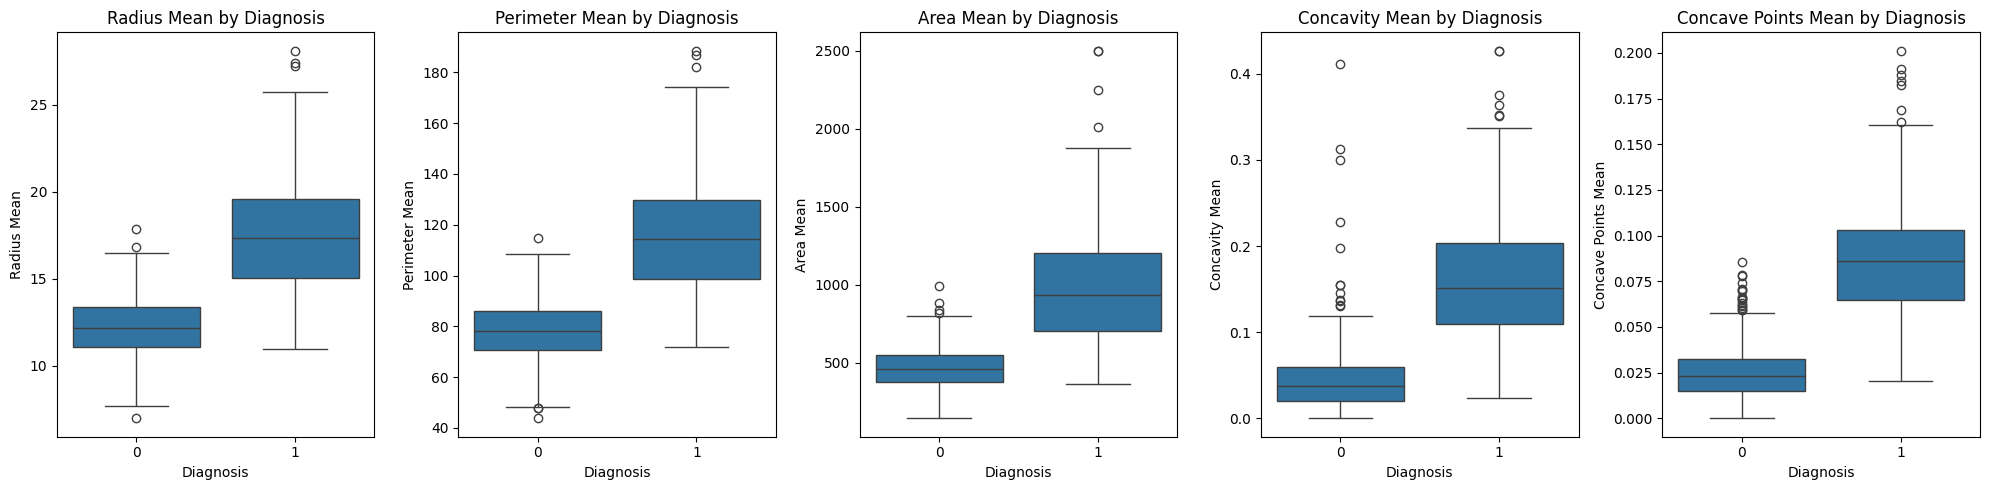

In [70]:
plt.figure(figsize=(20, 5))

# Box plot untuk radius_mean
plt.subplot(1, 5, 1)
sns.boxplot(x='diagnosis', y='radius_mean', data=df)
plt.title('Radius Mean by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Radius Mean')

# Box plot untuk perimeter_mean
plt.subplot(1, 5, 2)
sns.boxplot(x='diagnosis', y='perimeter_mean', data=df)
plt.title('Perimeter Mean by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Perimeter Mean')

# Box plot untuk area_mean
plt.subplot(1, 5, 3)
sns.boxplot(x='diagnosis', y='area_mean', data=df)
plt.title('Area Mean by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Area Mean')

# Box plot untuk concavity_mean
plt.subplot(1, 5, 4)
sns.boxplot(x='diagnosis', y='concavity_mean', data=df)
plt.title('Concavity Mean by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Concavity Mean')

# Box plot untuk concave points_mean
plt.subplot(1, 5, 5)
sns.boxplot(x='diagnosis', y='concave points_mean', data=df)
plt.title('Concave Points Mean by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Concave Points Mean')

plt.tight_layout()
plt.show()

# Radius Mean: Tumor ganas (Malignant) memiliki radius mean lebih tinggi dengan rentang yang lebih lebar dibanding tumor jinak (Benign).
# Perimeter Mean: Tumor ganas (Malignant) memiliki mean kebih tinggi dengan rentang yang lebih lebar dibanding tumor jinak(Benign).
# Area Mean: Tumor ganas menunjukkan area mean yang jauh lebih besar dibanding tumor jinak, dengan rentang yang lebih lebar.
# Concavity Mean: Tumor ganas memiliki nilai concavity mean yang lebih tinggi dibandingkan tumor jinak, menunjukkan perbedaan yang cukup jelas.
# Concave Points Mean: Tumor ganas cenderung memiliki concave points mean yang lebih besar dengan rentang yang jauh lebih lebar daripada tumor jinak.

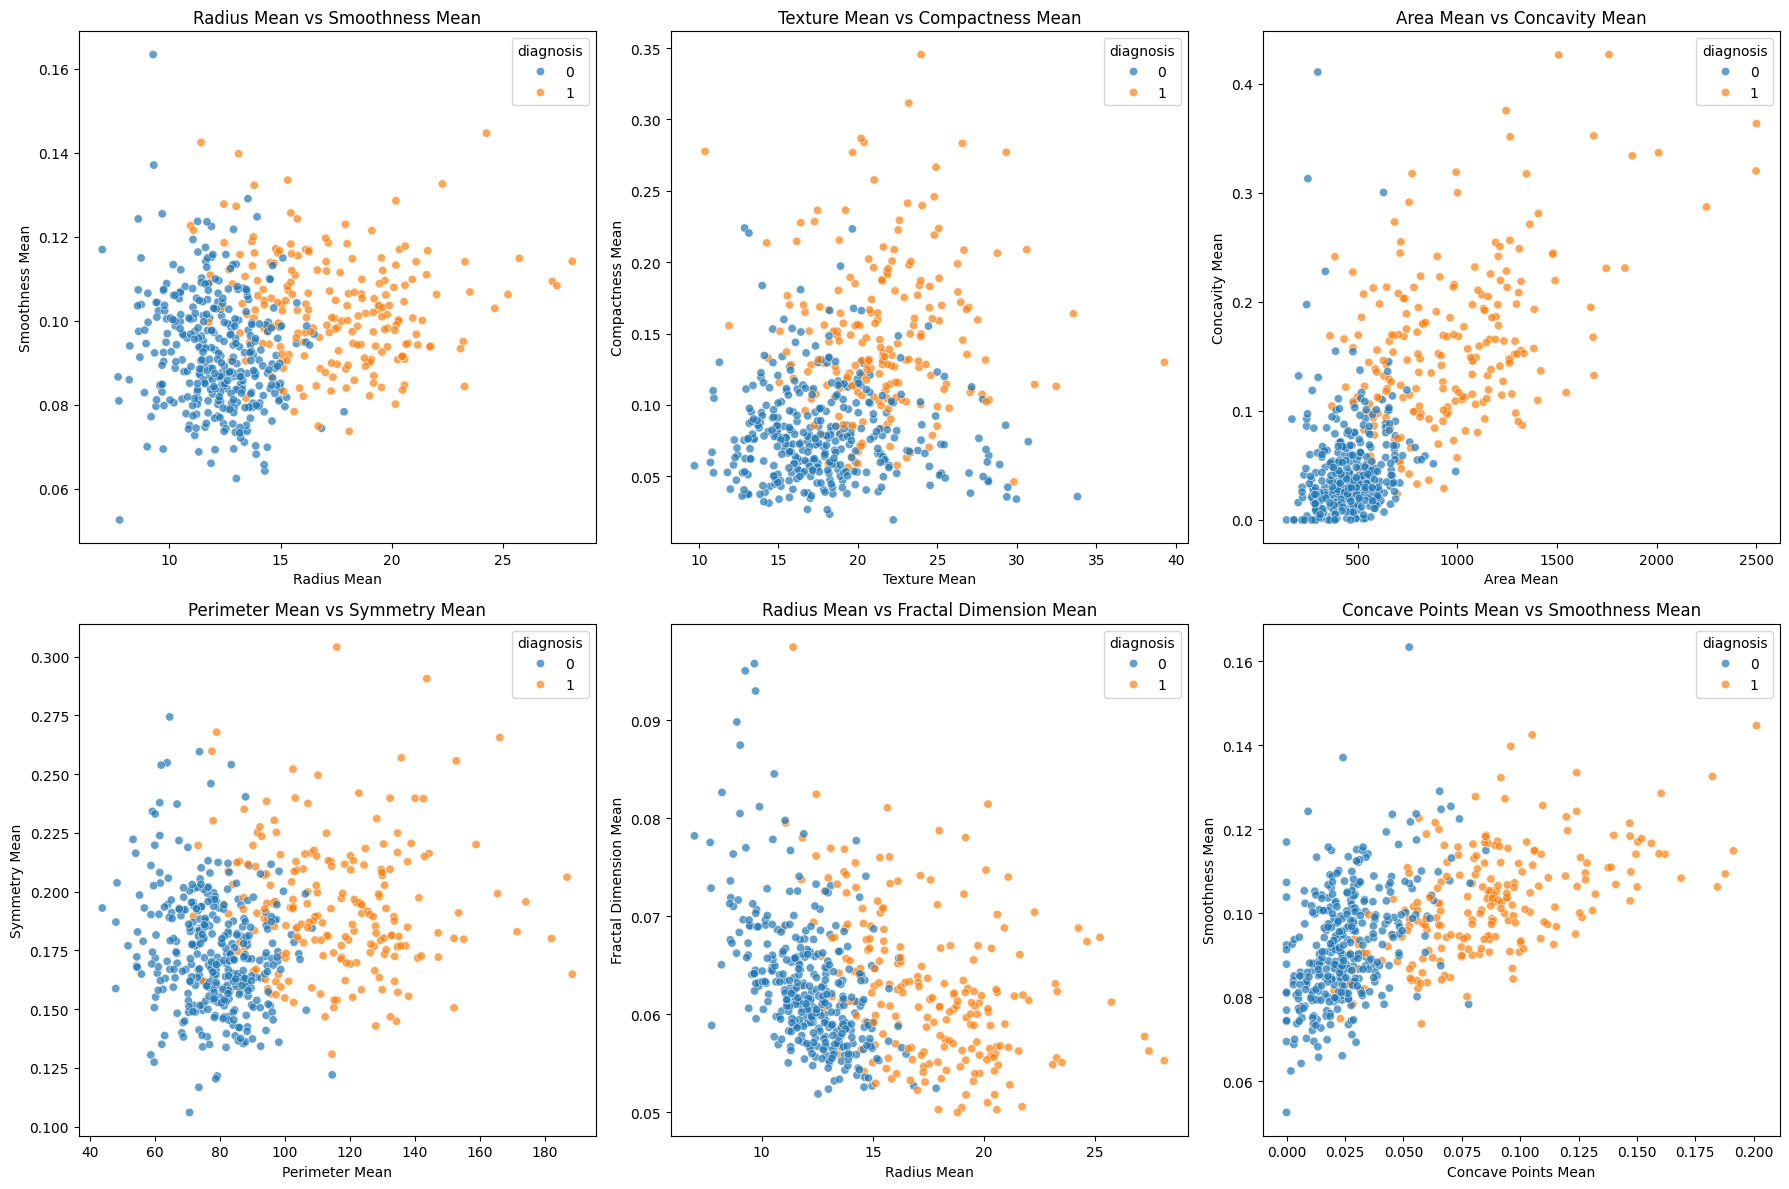

In [71]:
plt.figure(figsize=(18, 12))

# Scatter plot untuk radius_mean vs smoothness_mean
plt.subplot(2, 3, 1)
sns.scatterplot(x='radius_mean', y='smoothness_mean', hue='diagnosis', data=df, alpha=0.7)
plt.title('Radius Mean vs Smoothness Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Smoothness Mean')

# Scatter plot untuk texture_mean vs compactness_mean
plt.subplot(2, 3, 2)
sns.scatterplot(x='texture_mean', y='compactness_mean', hue='diagnosis', data=df, alpha=0.7)
plt.title('Texture Mean vs Compactness Mean')
plt.xlabel('Texture Mean')
plt.ylabel('Compactness Mean')

# Scatter plot untuk area_mean vs concavity_mean
plt.subplot(2, 3, 3)
sns.scatterplot(x='area_mean', y='concavity_mean', hue='diagnosis', data=df, alpha=0.7)
plt.title('Area Mean vs Concavity Mean')
plt.xlabel('Area Mean')
plt.ylabel('Concavity Mean')

# Scatter plot untuk perimeter_mean vs symmetry_mean
plt.subplot(2, 3, 4)
sns.scatterplot(x='perimeter_mean', y='symmetry_mean', hue='diagnosis', data=df, alpha=0.7)
plt.title('Perimeter Mean vs Symmetry Mean')
plt.xlabel('Perimeter Mean')
plt.ylabel('Symmetry Mean')

# Scatter plot untuk radius_mean vs fractal_dimension_mean
plt.subplot(2, 3, 5)
sns.scatterplot(x='radius_mean', y='fractal_dimension_mean', hue='diagnosis', data=df, alpha=0.7)
plt.title('Radius Mean vs Fractal Dimension Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Fractal Dimension Mean')

# Scatter plot untuk concave points_mean vs smoothness_mean
plt.subplot(2, 3, 6)
sns.scatterplot(x='concave points_mean', y='smoothness_mean', hue='diagnosis', data=df, alpha=0.7)
plt.title('Concave Points Mean vs Smoothness Mean')
plt.xlabel('Concave Points Mean')
plt.ylabel('Smoothness Mean')

plt.tight_layout()
plt.show()

# Radius Mean vs Smoothness Mean: Mengetahui bahwa radius lebih tinggi pada tumor ganas dapat membantu memfokuskan diagnosis awal berdasarkan ukuran rata-rata tumor.
# Texture Mean vs Compactness Mean: Hubungan antara tekstur dan kerapatan memberikan petunjuk tentang kompleksitas struktur tumor. Tumor dengan compactness tinggi dan tekstur rendah bisa lebih rentan menjadi ganas.
# Area Mean vs Concavity Mean: Hubungan kuat antara area dan concavity pada tumor ganas menunjukkan bahwa tumor yang lebih luas dan lebih cekung kemungkinan besar ganas. Ini dapat membantu dalam identifikasi tumor yang membutuhkan pemeriksaan lebih lanjut.
# Perimeter Mean vs Symmetry Mean: Mengetahui bahwa perimeter lebih besar bisa terkait dengan tumor ganas memungkinkan untuk memperhatikan kontur tumor selama pemeriksaan.
# Radius Mean vs Fractal Dimension Mean: Hubungan ini menunjukkan bahwa meskipun dimensinya bervariasi, tumor dengan radius besar cenderung ganas. Ini dapat digunakan untuk mendeteksi potensi keganasan berdasarkan ukuran tumor.
# Concave Points Mean vs Smoothness Mean: Hubungan ini dapat digunakan untuk mengidentifikasi tumor ganas, karena tumor ganas cenderung memiliki lebih banyak titik cekung. Ini dapat membantu dalam pengembangan model klasifikasi yang memprediksi keganasan.

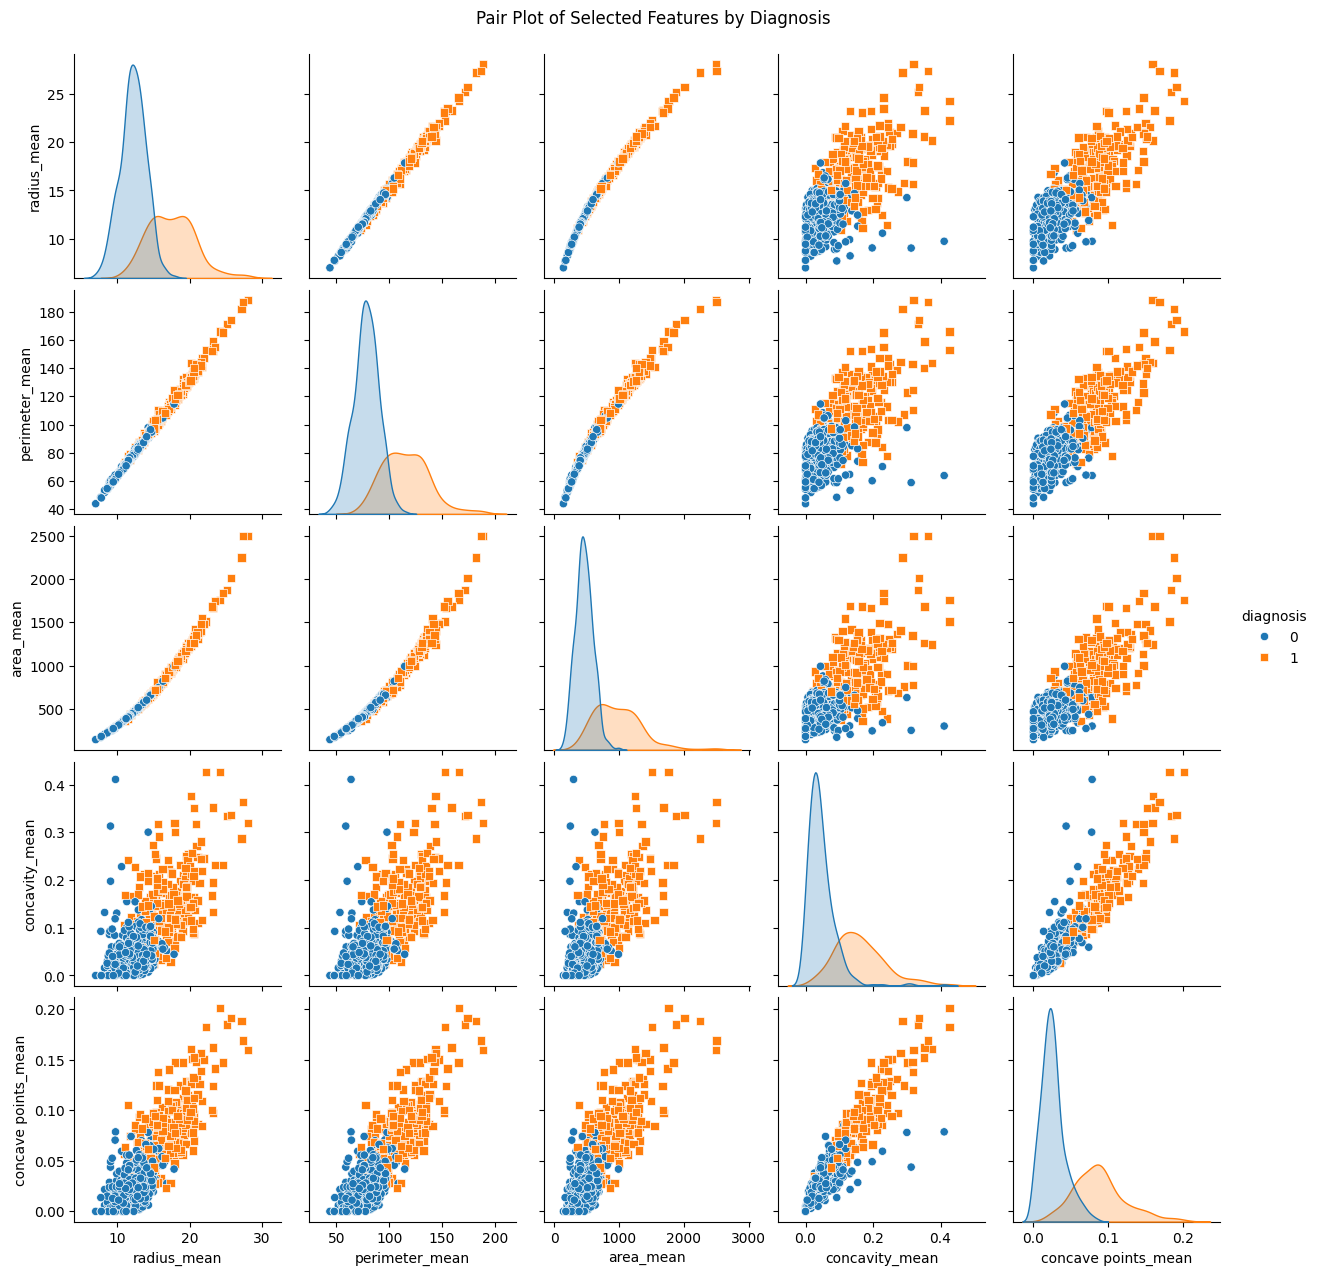

In [72]:
# Memilih variabel yang akan digunakan
variables = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
             'diagnosis']

# Membuat pair plot
sns.pairplot(df[variables], hue='diagnosis', markers=['o', 's'], diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features by Diagnosis', y=1.02)
plt.show()

# Code ini menghasilkan pair plot untuk dataset menggunakan library seaborn
# Membuat matriks scatter plot untuk setiap kombinasi variable yang paling memiliki relasi kuat dalam dataset, dengan warna titik yang ditentukan oleh kolom diagnosis.
# Ini memungkinkan visualisasi hubungan antar variable serta distribusi data berdasarkan hasil.

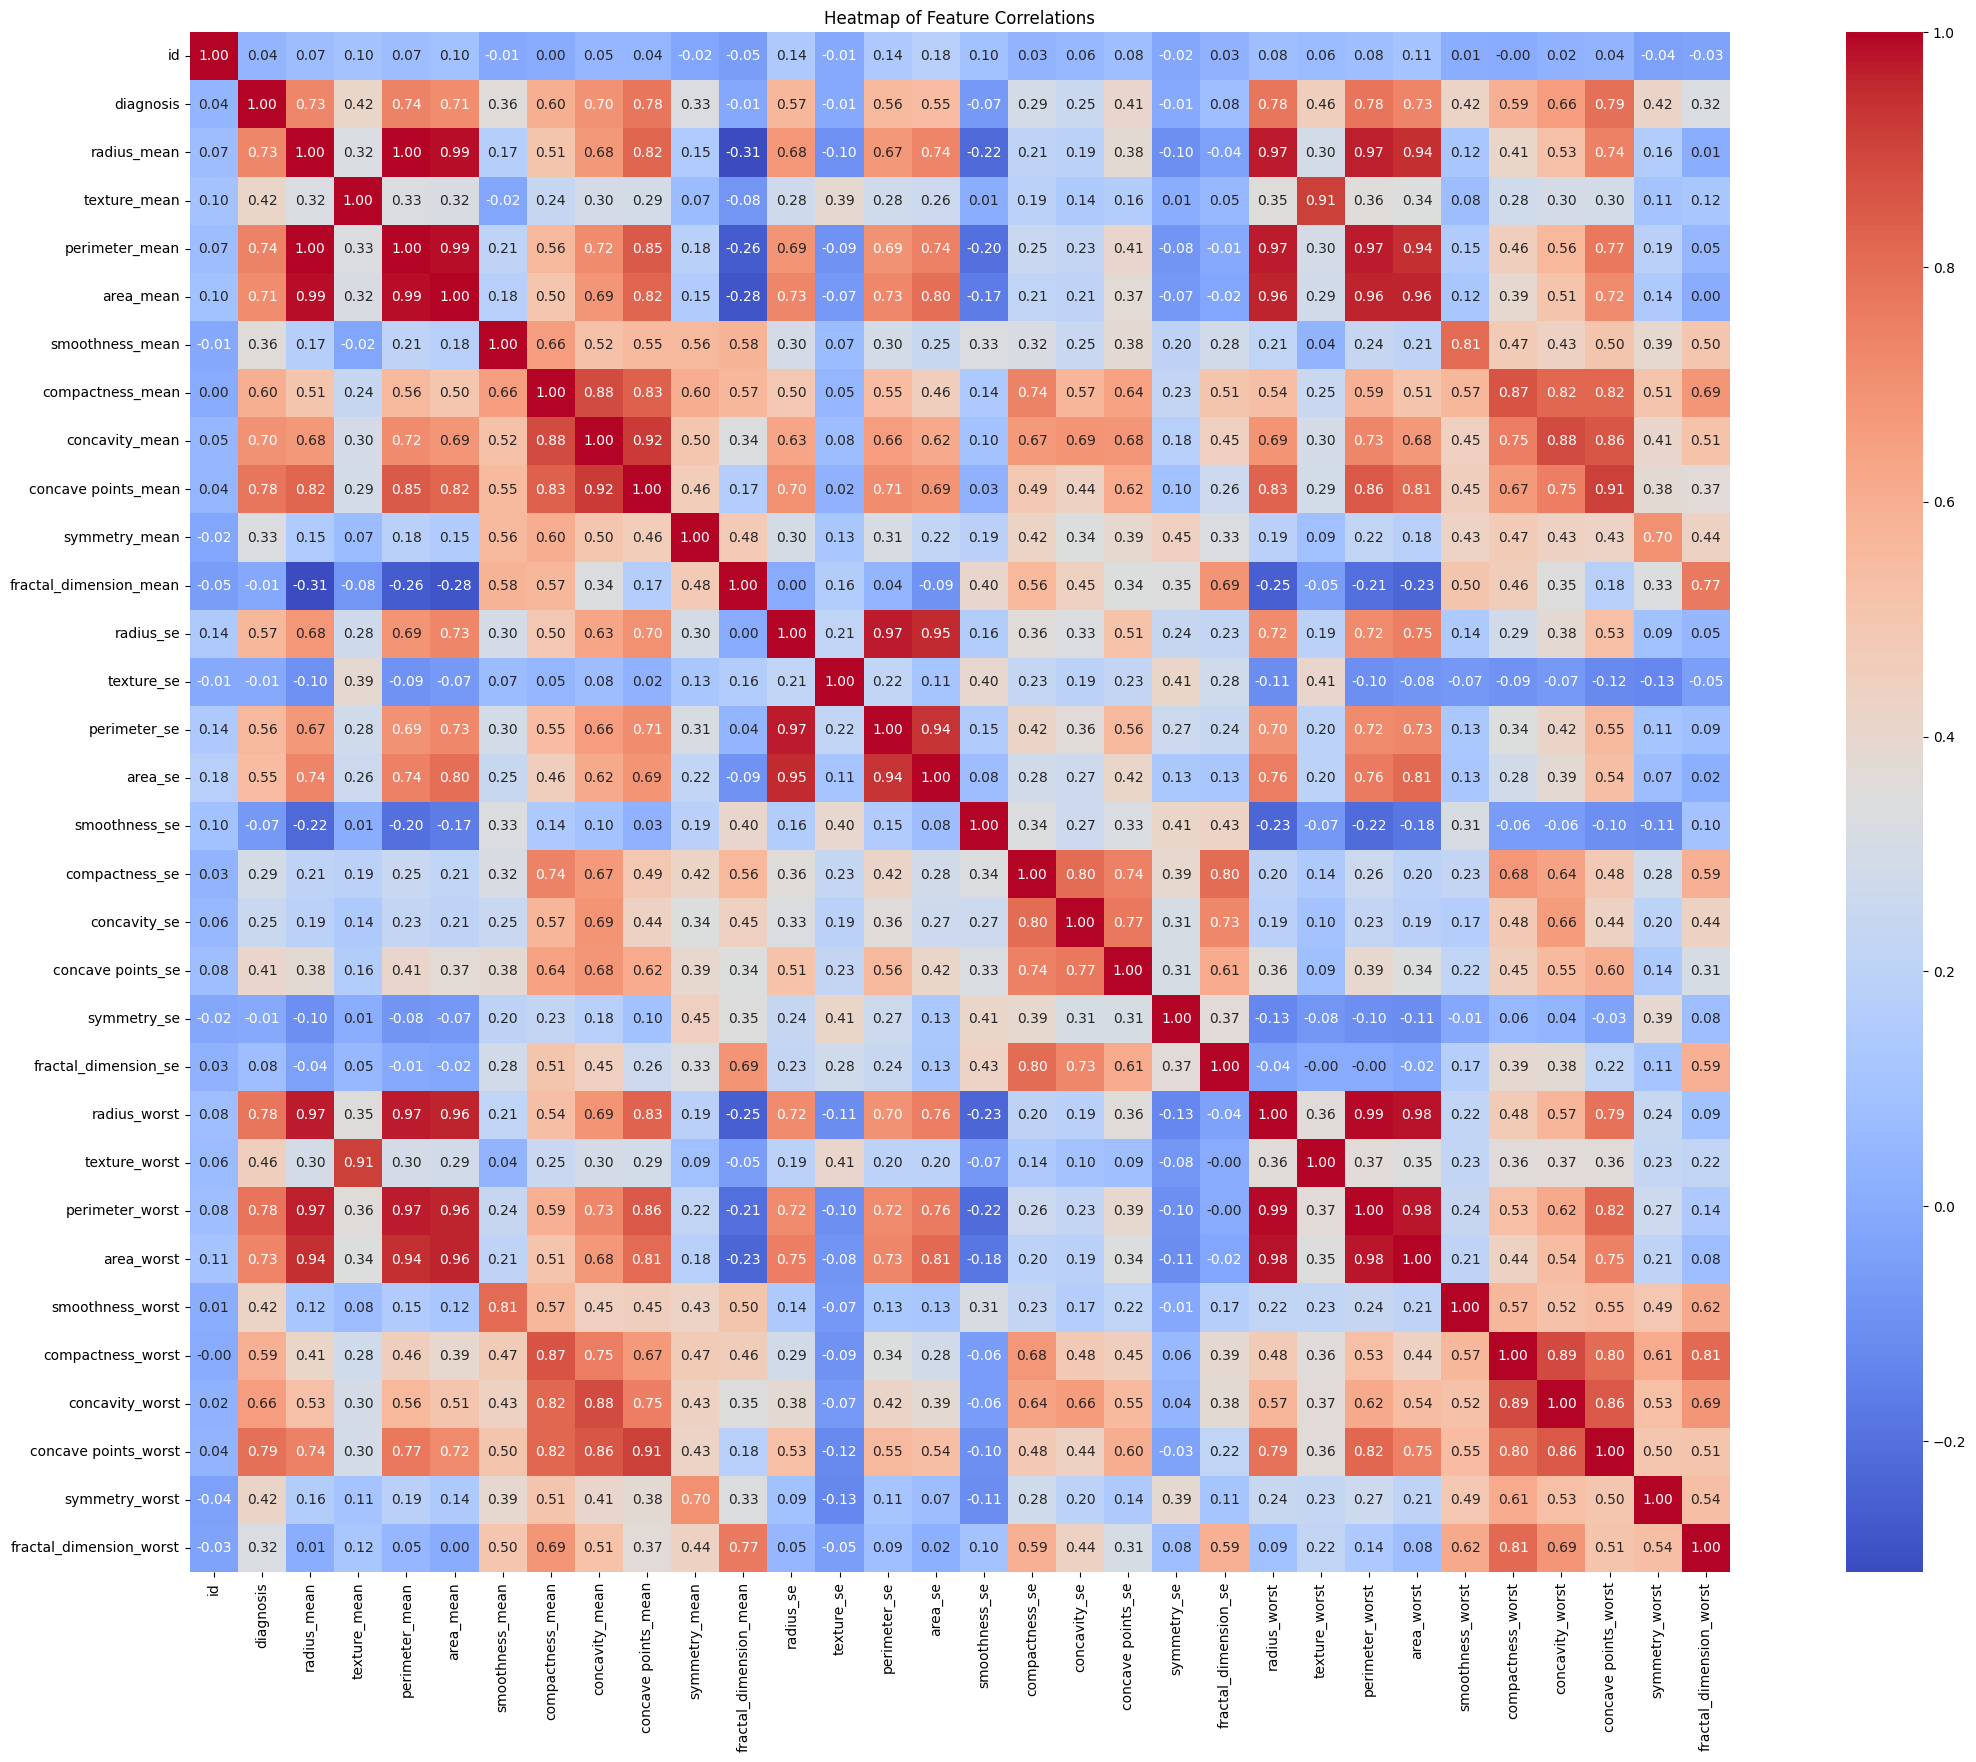

In [73]:
correlation_matrix = df.corr()

# Membuat heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Heatmap of Feature Correlations')
plt.show()

# Heatmap korelasi ini menunjukkan hubungan antara fitur-fitur yang diukur pada dataset kanker payudara, memberikan gambaran tentang seberapa kuat dan arah hubungan antarvariabel.
# Setiap nilai dalam heatmap berkisar dari -1 hingga 1, di mana nilai mendekati 1 menunjukkan korelasi positif yang kuat, dan nilai mendekati -1 menunjukkan korelasi negatif yang kuat.
#Misalnya, fitur seperti radius_mean, perimeter_mean, dan area_mean memiliki korelasi yang sangat tinggi, mendekati nilai 1, yang berarti bahwa ketika radius tumor meningkat, perimeter dan area cenderung meningkat juga.
# Hubungan kuat ini dapat diartikan bahwa fitur-fitur ini saling terkait secara alami karena perubahan ukuran tumor. Di sisi lain, fitur seperti texture_mean memiliki korelasi yang lebih rendah dengan fitur-fitur lain, yang menunjukkan bahwa sifat tekstur tumor mungkin tidak selalu berbanding lurus dengan ukuran atau bentuknya.

# Selain itu, kita juga dapat melihat beberapa korelasi yang signifikan dengan kolom diagnosis, yang menunjukkan adanya hubungan antara beberapa fitur dan kemungkinan diagnosis kanker ganas atau jinak.
# Sebagai contoh, fitur seperti concave points_mean, concavity_mean, dan area_mean menunjukkan korelasi positif dengan diagnosis, yang berarti nilai lebih tinggi pada fitur-fitur ini seringkali terkait dengan diagnosa tumor yang ganas. Sebaliknya, beberapa fitur seperti smoothness_mean memiliki korelasi yang lebih rendah dengan diagnosis, yang menunjukkan bahwa fitur ini mungkin kurang relevan dalam menentukan jenis tumor secara langsung.
# Analisis ini memberikan wawasan awal mengenai fitur-fitur yang lebih berpengaruh dalam model prediksi diagnosis, yang dapat digunakan untuk membangun model machine learning dengan memilih fitur yang paling berkaitan secara kuat dengan diagnosis kanker payudara.

## Machine Learning
1. Splitting X and y

In [74]:
#1
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# X: Semua fitur (kolom) dalam dataset kecuali kolom diagnosis. Ini adalah variabel independen (fitur) yang akan digunakan untuk memprediksi.
# y: Kolom diagnosis, yang merupakan target atau label yang ingin diprediksi.

In [75]:
#2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data displit menjadi data train dan data test

In [76]:
#3
X_train.shape, X_test.shape

# Menunjukkan jumlah baris (contoh data) dan jumlah kolom (fitur).

((455, 31), (114, 31))

## Gini

In [77]:
#a
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)

# Menciptakan objek clf_gini sebagai model Decision Tree dengan kriteria pembagian yang ditentukan oleh gini.
# Parameter random_state=42 digunakan untuk memastikan bahwa hasil yang diperoleh dapat dihasilkan di lain waktu dengan pengacakan yang konsisten.
# Melatih model Decision Tree menggunakan data pelatihan (X_train) dan labelnya (y_train).
# Proses ini mengajarkan model bagaimana mengklasifikasikan data berdasarkan fitur yang ada pada X_train.

DecisionTreeClassifier(random_state=42)

In [78]:
#b
y_pred_gini = clf_gini.predict(X_test)

# Menentukan label spesies penguin berdasarkan fitur yang ada di data pengujian.

In [79]:
#c
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print("Model accuracy score with criterion gini: " , accuracy_gini)

# Nilai 0.938 menunjukkan bahwa model Decision Tree yang menggunakan kriteria Gini berhasil mencapai akurasi 93,8% / 94% pada data pengujian.

Model accuracy score with criterion gini:  0.9385964912280702


In [80]:
#d
train_score = clf_gini.score(X_train, y_train)
print(f"Training set score: {train_score:.4f}")

# Skor pada test set
test_score = clf_gini.score(X_test, y_test)
print(f"Test set score: {test_score:.4f}")

# Training set score: 1.0000: Ini berarti model mencapai akurasi 100% pada data pelatihan, yang menunjukkan bahwa model berhasil mengklasifikasikan semua data pelatihan dengan benar.
# Test set score: 0.9386: Ini berarti model mencapai akurasi sekitar 93.8% / 94% pada data pengujian.

Training set score: 1.0000
Test set score: 0.9386


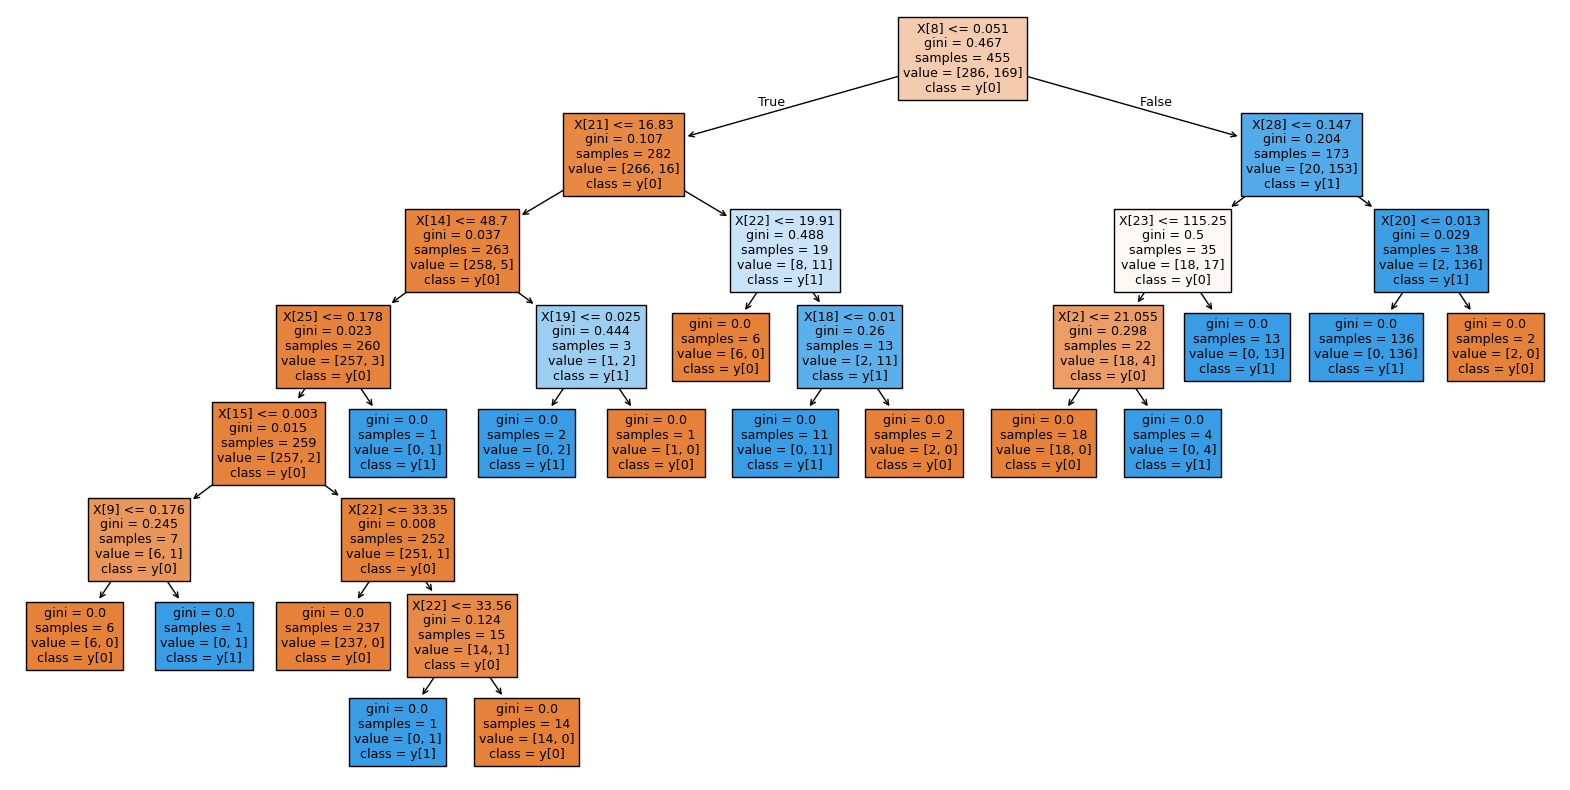

In [81]:
#e
plt.figure(figsize=(20,10))
tree.plot_tree(clf_gini, feature_names=[f"X[{i}]" for i in range(X.shape[1])], filled=True, class_names=True)
plt.show()

# Conclusion
# Node Akar (X[8] <= 0.051): Titik awal pemisahan, yang memeriksa apakah fitur X[8] kurang dari atau sama dengan 0.051.
# Gini = 0.467 (menunjukkan tingkat ketidakpastian/keragaman data).
# Ada 455 sampel di node ini, terbagi dalam dua kelas: 169 sampel di kelas y[0], dan 286 sampel di kelas y[1], Kelas mayoritas di sini adalah y[1].

# Cabang Kiri (X[21] <= 16.83): Setelah memisahkan berdasarkan X[8] <= 0.051, cabang kiri memeriksa apakah X[21] kurang dari atau sama dengan 16.83.
# Gini di node ini lebih rendah, yaitu 0.107.
# 282 sampel tersisa, mayoritas di kelas y[1] (16 sampel di y[0], dan 266 di y[1]). Cabang ini kemudian dipecah lagi berdasarkan X[14] <= 48.7, dan X[22] <= 19.91.

#Cabang Kanan (X[28] <= 0.147):
# Jika X[8] lebih besar dari 0.051, maka data menuju ke cabang kanan.
# Gini di sini lebih rendah, yaitu 0.204, dengan 173 sampel yang mayoritas berada di kelas y[0] (20 sampel di y[1]).
# Cabang ini memeriksa lebih lanjut apakah X[28] <= 0.147, kemudian dibagi lagi berdasarkan X[23] dan X[20].

# Node:
# Setiap cabang pada akhirnya mencapai node daun, di mana entropy menjadi 0, artinya tidak ada lagi ketidakpastian, dan semua sampel di node tersebut termasuk dalam satu kelas tertentu.
# Inti dari model ini adalah bahwa Decision Tree membagi data menjadi kelompok-kelompok yang lebih kecil berdasarkan fitur-fitur tertentu, sampai mencapai titik di mana setiap kelompok memiliki klasifikasi yang jelas (entropy 0).
# Model ini menggunakan fitur-fitur seperti X[1], X[2], dan X[3] untuk memutuskan bagaimana membagi data dengan cara yang meminimalkan ketidakpastian atau keragaman di setiap cabang.

In [82]:
#f
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)
print("Confusion Matrix (Gini):")
print(conf_matrix_gini)

# 67: True Positive (kasus positif yang diprediksi dengan benar)
# 4: False Negative (kasus positif yang diprediksi sebagai negatif)
# 3: False Positive (kasus negatif yang diprediksi sebagai positif)
# 40: True Negative (kasus negatif yang diprediksi dengan benar)

Confusion Matrix (Gini):
[[67  4]
 [ 3 40]]


In [83]:
#g
class_report_gini = classification_report(y_test, y_pred_gini)
print("Classification Report (Gini):")
print(class_report_gini)

# Precision:
# Untuk malignant (0), precision-nya adalah 0.96, artinya 96% dari prediksi yang diklasifikasikan sebagai malignant memang benar.
# Untuk benign (1), precision-nya adalah 0.91, artinya 91% dari prediksi yang diklasifikasikan sebagai benign memang benar.

# Recall:
# Untuk malignant (0), recall adalah 0.94, artinya 94% dari data malignant diidentifikasi dengan benar oleh model.
# Untuk benign (1), recall adalah 0.93, artinya 93% dari data benign diidentifikasi dengan benar.

# F1-Score:
# Untuk malignant (0), f1-score adalah 0.95. Rata-rata harmonis dari precision dan recall untuk kelas ini.
# Untuk benign (1), f1-score adalah 0.92. Rata-rata harmonis dari precision dan recall untuk kelas ini.

# Akurasi: 0.94 : Model memprediksi dengan benar 94% dari total data uji.

Classification Report (Gini):
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        71
           1       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



## Logistic Regression

In [84]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Scaler = MinMaxScaler() membuat objek scaler yang akan digunakan untuk menstandarkan data ke dalam rentang tertentu (default adalah [0, 1]).
# Menggunakan MinMaxScaler membantu memastikan semua fitur dalam dataset memiliki skala yang sama, yang dapat meningkatkan kinerja algoritma Machine Learning.

In [85]:
# a
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

# Inisialisasi Model: model = LogisticRegression(max_iter=200) membuat objek model regresi logistik dengan parameter max_iter=200, yang berarti model akan melakukan maksimal 200 iterasi untuk mencapai konvergensi.
# Melatih Model: model.fit(X_train, y_train) melatih model menggunakan data fitur yang telah distandarkan (X_train) dan label target (y_train). Proses ini mengoptimalkan bobot model untuk meminimalkan kesalahan prediksi terhadap data pelatihan.

LogisticRegression(max_iter=200)

In [86]:
# b
y_pred_logreg = logreg.predict(X_test)

# Menentukan label outcome berdasarkan fitur yang ada di data pengujian.

In [87]:
# c
predictions = logreg.predict(X_test)
accuracy_log = accuracy_score(y_test, predictions)
print("Model accuracy score with Logistic: " , accuracy_log)

# Membuat Prediksi: predictions = logreg.predict(X_test) menggunakan model regresi logistik (logreg) untuk membuat prediksi pada data uji (X_test).
# Hasilnya adalah array yang berisi label yang diprediksi untuk setiap contoh dalam X_test.

# Menghitung akurasi model dengan membandingkan label sebenarnya (y_test) dengan label yang diprediksi (predictions).
# Akurasinya adalah sekitar 0.956, yang berarti model memprediksi dengan benar sekitar 9.56% dari data uji.

Model accuracy score with Logistic:  0.956140350877193


In [88]:
#d
conf_matrix_log = confusion_matrix(y_test, y_pred_logreg)
print("Confusion Matrix (Logistic regression):")
print(conf_matrix_log)

# 70: True Positive (kasus positif yang diprediksi dengan benar)
# 1: False Negative (kasus positif yang diprediksi sebagai negatif)
# 4: False Positive (kasus negatif yang diprediksi sebagai positif)
# 39: True Negative (kasus negatif yang diprediksi dengan benar)

Confusion Matrix (Logistic regression):
[[70  1]
 [ 4 39]]


In [89]:
#e
class_report_log = classification_report(y_test, y_pred_logreg)
print("Classification Report (Logistic Regression):")
print(class_report_log)

# Precision:
# Untuk malignant (0), precision-nya adalah 0.95, artinya 95% dari prediksi yang diklasifikasikan sebagai malignant memang benar.
# Untuk benign (1), precision-nya adalah 0.97, artinya 97% dari prediksi yang diklasifikasikan sebagai benign memang benar.

# Recall:
# Untuk malignant (0), recall adalah 0.99, artinya 99% dari data malignant diidentifikasi dengan benar oleh model.
# Untuk benign (1), recall adalah 0.91, artinya 91% dari data benign diidentifikasi dengan benar.

# F1-Score:
# Untuk malignant (0), f1-score adalah 0.97. Rata-rata harmonis dari precision dan recall untuk kelas ini.
# Untuk benign (1), f1-score adalah 0.94. Rata-rata harmonis dari precision dan recall untuk kelas ini.

# Akurasi: 0.96 : Model memprediksi dengan benar 96% dari total data uji.

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## K Nearest Neighbors (K-NN)

In [90]:
#a
# Make the classification model
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
classifier.fit(X_train, y_train)

# Kode ini membuat model klasifikasi K-Nearest Neighbors (KNN) dengan 5 tetangga terdekat dan jarak euclidean sebagai metrik pengukurannya.
# Kemudian melatih model tersebut menggunakan data X_train dan y_train.

KNeighborsClassifier(metric='euclidean')

In [91]:
# b
y_pred_knn = classifier.predict(X_test)
# Menentukan label outcome berdasarkan fitur yang ada di data pengujian.

In [92]:
# c
predictions = classifier.predict(X_test)
accuracy_knn = accuracy_score(y_test, predictions)
print("Model accuracy score with K-NN: " , accuracy_knn)

# Membuat Prediksi: predictions = classifier.predict(X_test) menggunakan model knn untuk membuat prediksi pada data uji (X_test).
# Hasilnya adalah array yang berisi label yang diprediksi untuk setiap contoh dalam X_test.

# Menghitung akurasi model dengan membandingkan label sebenarnya (y_test) dengan label yang diprediksi (predictions).
# Akurasinya adalah sekitar 0.754, yang berarti model memprediksi dengan benar sekitar 75.4% dari data uji.

Model accuracy score with K-NN:  0.7543859649122807


In [93]:
#d
# Display the accuracy score
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix (K-NN):")
print(conf_matrix_knn)

# 63: True Positive (kasus positif yang diprediksi dengan benar)
# 8: False Negative (kasus positif yang diprediksi sebagai negatif)
# 20: False Positive (kasus negatif yang diprediksi sebagai positif)
# 23: True Negative (kasus negatif yang diprediksi dengan benar)

Confusion Matrix (K-NN):
[[63  8]
 [20 23]]


In [94]:
#e
class_report_knn = classification_report(y_test, y_pred_knn)
print("Classification Report (K-NN):")
print(class_report_knn)

# Precision:
# Untuk malignant (0), precision-nya adalah 0.76, artinya 76% dari prediksi yang diklasifikasikan sebagai malignant memang benar.
# Untuk benign (1), precision-nya adalah 0.74, artinya 74% dari prediksi yang diklasifikasikan sebagai benign memang benar.

# Recall:
# Untuk malignant (0), recall adalah 0.89, artinya 89% dari data malignant diidentifikasi dengan benar oleh model.
# Untuk benign (1), recall adalah 0.53, artinya 53% dari data benign diidentifikasi dengan benar.

# F1-Score:
# Untuk malignant (0), f1-score adalah 0.82. Rata-rata harmonis dari precision dan recall untuk kelas ini.
# Untuk benign (1), f1-score adalah 0.62. Rata-rata harmonis dari precision dan recall untuk kelas ini.

# Akurasi: 0.75 : Model memprediksi dengan benar 75% dari total data uji.

Classification Report (K-NN):
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        71
           1       0.74      0.53      0.62        43

    accuracy                           0.75       114
   macro avg       0.75      0.71      0.72       114
weighted avg       0.75      0.75      0.74       114

